In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
us_census=pd.DataFrame(np.concatenate([pd.read_csv("states0.csv"),pd.read_csv("states1.csv"),pd.read_csv("states2.csv"),pd.read_csv("states3.csv"),pd.read_csv("states4.csv"),pd.read_csv("states5.csv"),pd.read_csv("states6.csv"),pd.read_csv("states7.csv"),pd.read_csv("states8.csv"),pd.read_csv("states9.csv")]))
us_census.columns=["num","State","TotalPop","Hispanic","White","Black","Native","Asian","Pacific","Income","GenderPop"]

In [2]:
print(us_census.columns)
print(us_census.dtypes)

Index(['num', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
num          object
State        object
TotalPop     object
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [3]:
us_census.head()

,num,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [4]:
for i in range(len(us_census)):
    us_census.iloc[i,9]=re.sub(r"\$","",us_census.iloc[i,9])
    us_census.iloc[i,9]=round(float(us_census.iloc[i,9]),2)

In [5]:
us_census["MPop"]=range(60)
us_census["FPop"]=range(60)
for i in range(len(us_census)):
    M_F=us_census.iloc[i,-3].split("_")
    us_census.iloc[i,-2]=M_F[0]
    us_census.iloc[i,-1]=M_F[1]

In [6]:
for i in range(len(us_census)):
    us_census.iloc[i,-2]=re.sub("M","",str(us_census.iloc[i,-2]))
    us_census.iloc[i,-1]=re.sub("F","",str(us_census.iloc[i,-1]))

In [7]:
try:
    plt.scatter(us_census["FPop"].astype("int"),us_census["Income"])
    plt.show()
except:
    print("Error")

Error


In [8]:
us_census["FPop"]=np.where(us_census["FPop"]=="",us_census["FPop"],pd.DataFrame(us_census["TotalPop"].astype("int64")-us_census["MPop"].astype("int64")).astype("object"))
print(us_census["FPop"])

0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
6      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
12     5123362
13      696428
14      806083
15     6556862
16     3333382
17     1558931
18     1558931
19     1453125
20     2233145
21     2364097
22      679019
23     3057895
24     3057895
25     3455936
26     5038598
27     2727005
28     1536358
29     3081445
30     3081445
31      504536
32      939759
33     1390901
34      670717
35     4561386
36     4561386
37     1051703
38    10131373
39     5049925
40      353677
41     5913084
42     5913084
43     1942789
44     1990780
45     6534215
46     1869213
47      543273
48      543273
49     2455167
50      419713
51     3331859
52    13367298
53     1444150
54     1444150
55      318031
56     4195682
57     3497739
58      937789
59     2890732
Name: FPop, dtype: object


In [9]:
us_census=us_census.iloc[:,1:]
us_census.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29     True
30     True
31    False
32    False
33    False
34    False
35     True
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47     True
48     True
49    False
50    False
51    False
52    False
53     True
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [10]:
us_census=us_census.drop_duplicates()

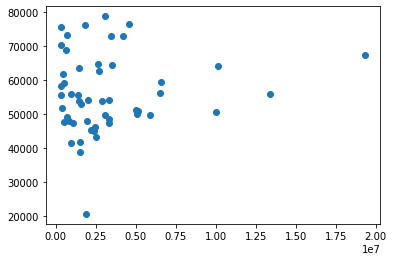

In [11]:
plt.scatter(us_census["FPop"].astype("float"),us_census["Income"].astype("float"))
plt.show()

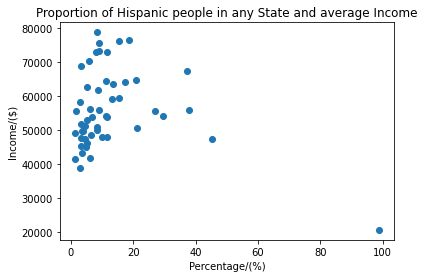

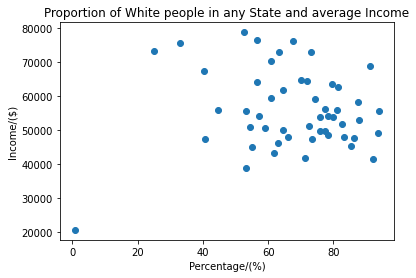

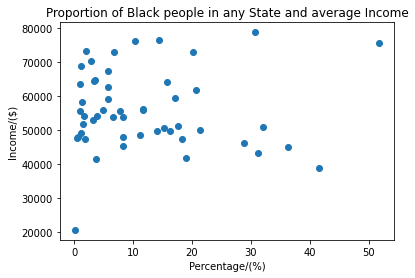

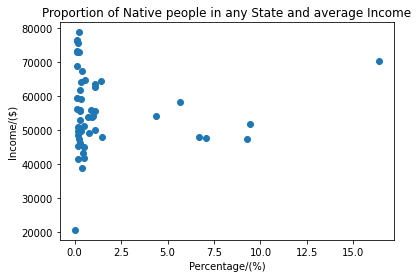

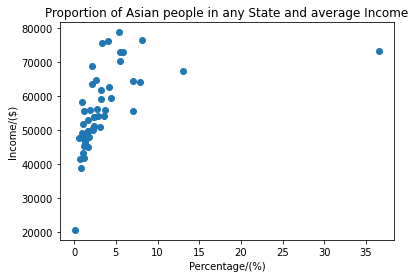

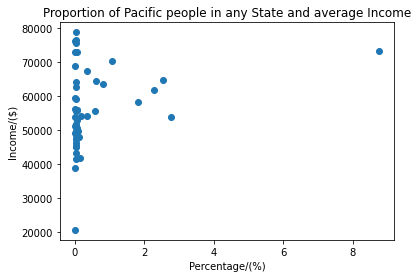

In [12]:
for i in range(len(us_census)):
    for x in range(2,8):
        try:
            us_census.iloc[i,x]=float(str(us_census.iloc[i,x]).replace("%",""))
        except:
            pass

us_census["Pacific"]=us_census["Pacific"].fillna(100-us_census["Hispanic"]-us_census["White"]-us_census["Black"]-us_census["Native"]-us_census["Asian"])
us_census.iloc[:,2:9]=us_census.iloc[:,2:9].astype("float")
def ri():
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of Hispanic people in any State and average Income")
    plt.show(plt.scatter(us_census["Hispanic"],us_census["Income"]))
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of White people in any State and average Income")
    plt.show(plt.scatter(us_census["White"],us_census["Income"]))
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of Black people in any State and average Income")
    plt.show(plt.scatter(us_census["Black"],us_census["Income"]))
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of Native people in any State and average Income")
    plt.show(plt.scatter(us_census["Native"],us_census["Income"]))
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of Asian people in any State and average Income")
    plt.show(plt.scatter(us_census["Asian"],us_census["Income"]))
    plt.xlabel("Percentage/(%)")
    plt.ylabel("Income/($)")
    plt.title("Proportion of Pacific people in any State and average Income")
    plt.show(plt.scatter(us_census["Pacific"],us_census["Income"]))

ri()